## AssQ-DL-Implementation of ANN in Keras

In [ ]:
Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [ ]:
To install the latest versions of TensorFlow and Keras, 
you can use the following pip commands:

In [3]:
! pip install tensorflow
! pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 31.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 36.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 43.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 43.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 14.6 M

In [5]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.13.0


AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [ ]:
Keep in mind that the commands and code above assume you have Python and pip properly 
set up in your environment. Also, make sure you're using a virtual environment if desired to
avoid conflicts with other packages.

In [ ]:
Q2. Load the Wine Quality dataset and explore its dimensions. 

In [ ]:
 the Wine Quality dataset is a popular dataset for regression tasks. It contains various 
    chemical properties of wines and their associated quality ratings. You can load it using 
    the pandas library in Python. If you don't have it installed, you can install it using:


In [6]:
! pip install pandas

In [7]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=';')

# Display the dimensions of the dataset
rows, columns = wine_data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 4898
Number of columns: 12


In [ ]:
This code snippet will load the dataset from the provided URL and then 
print the number of rows and columns in the dataset. The dataset contains 
information about various chemical properties of white wines and their quality ratings.

In [ ]:
Q3. Check for null values, identify categorical variables, and encode them.

In [ ]:
To check for null values, identify categorical variables, and encode them, you can use the following code:

In [8]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=';')

# Check for null values
null_counts = wine_data.isnull().sum()
print("Null value counts:")
print(null_counts)

# Identify categorical variables
categorical_vars = wine_data.select_dtypes(include=['object']).columns
print("Categorical variables:")
print(categorical_vars)

# Encode categorical variables
wine_data_encoded = pd.get_dummies(wine_data, columns=categorical_vars)

# Display the dimensions of the encoded dataset
encoded_rows, encoded_columns = wine_data_encoded.shape
print("Encoded dataset dimensions - rows:", encoded_rows)
print("Encoded dataset dimensions - columns:", encoded_columns)

Null value counts:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical variables:
Index([], dtype='object')
Encoded dataset dimensions - rows: 4898
Encoded dataset dimensions - columns: 12


In [ ]:
In this code, isnull().sum() is used to count the null values in each column of 
the dataset. The select_dtypes() function helps identify columns with categorical data types.
The pd.get_dummies() function is used to one-hot encode the categorical variables.
This will create new columns for each category in the categorical variables.
The dimensions of the encoded dataset are then printed.

In [ ]:
Q4. Separate the features and target variables from the dataset.

In [ ]:
To separate the features and target variables from the dataset, you can use the following code:

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=';')

# Separate features and target variable
features = wine_data.drop(columns=['quality'])  # Drop the 'quality' column
target = wine_data['quality']

# Split the data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the dimensions of the datasets
print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)
print("Train target shape:", train_target.shape)
print("Test target shape:", test_target.shape)

Train features shape: (3918, 11)
Test features shape: (980, 11)
Train target shape: (3918,)
Test target shape: (980,)


In [ ]:
In this code, the drop() function is used to remove the 'quality' column from the features,
and the 'quality' column becomes the target variable. The train_test_split() function is 
then used to split the data into training and testing sets. 
The dimensions of the resulting datasets are printed to verify the separation.

In [ ]:
Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [ ]:
To perform a train-test split and further divide the data into training, validation, 
and test datasets, you can use the following code:

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=';')

# Separate features and target variable
features = wine_data.drop(columns=['quality'])  # Drop the 'quality' column
target = wine_data['quality']

# Split the data into training, validation, and test sets
train_features, temp_features, train_target, temp_target = train_test_split(features, target, test_size=0.3, random_state=42)
validation_features, test_features, validation_target, test_target = train_test_split(temp_features, temp_target, test_size=0.5, random_state=42)

# Display the dimensions of the datasets
print("Train features shape:", train_features.shape)
print("Validation features shape:", validation_features.shape)
print("Test features shape:", test_features.shape)
print("Train target shape:", train_target.shape)
print("Validation target shape:", validation_target.shape)
print("Test target shape:", test_target.shape)

Train features shape: (3428, 11)
Validation features shape: (735, 11)
Test features shape: (735, 11)
Train target shape: (3428,)
Validation target shape: (735,)
Test target shape: (735,)


In [ ]:
In this code, the data is first divided into training and the rest (temp) using train_test_split(). 
Then, the temp data is further divided into validation and test sets. This will result in three 
sets of features and target variables: training, validation, and test. The dimensions of these
datasets are printed to verify the split.


In [ ]:
Q6. Scale the dataset using an appropriate scaling technique.

In [ ]:
Scaling the features of a dataset is an important preprocessing step to ensure that all 
features have similar scales. A common scaling technique is Standardization (Z-score normalization),
which scales the features to have zero mean and unit variance. You can use the StandardScaler 
from the sklearn.preprocessing module to achieve this. 
Here's how you can scale the dataset using Standardization:

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=';')

# Separate features and target variable
features = wine_data.drop(columns=['quality'])  # Drop the 'quality' column
target = wine_data['quality']

# Split the data into training, validation, and test sets
train_features, temp_features, train_target, temp_target = train_test_split(features, target, test_size=0.3, random_state=42)
validation_features, test_features, validation_target, test_target = train_test_split(temp_features, temp_target, test_size=0.5, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
validation_features_scaled = scaler.transform(validation_features)
test_features_scaled = scaler.transform(test_features)

# Display the scaled features of the training set
print("Scaled features of the training set:")
print(train_features_scaled)

Scaled features of the training set:
[[-0.31132265 -0.28780076 -0.27645327 ... -1.13031916  0.0940735
  -1.14685943]
 [ 1.10470658 -0.18935432  1.30066456 ... -1.06354794 -1.49278025
   0.64257527]
 [-0.66532995 -0.48469365 -0.02743466 ...  0.87281754 -0.61119484
   0.56123733]
 ...
 [ 0.86870171 -0.09090788  1.54968316 ... -1.13031916  0.35854912
   0.72391321]
 [-0.66532995 -0.3862472  -0.35945947 ... -0.12875081 -0.963829
   0.07320968]
 [ 1.45871389 -0.09090788  0.13857774 ...  0.2051053   1.24013454
  -0.0894662 ]]


In [ ]:
In this code, the StandardScaler is used to scale the features. 
The fit_transform() method is applied to the training features, and the transform() method 
is applied to the validation and test features using the scaling parameters learned from the training data.
The scaled features of the training set are then printed.

In [ ]:
Q7. Design and implement at least two hidden layers and an output layer for the binary categorical 
variables.

In [ ]:

Sure, here's an example of how you can design and implement a neural network with at least 
two hidden layers and an output layer for binary categorical variables using TensorFlow and Keras. In this example,
I'll assume you have already preprocessed the data and have scaled features and target variables.

In [26]:
import tensorflow as tf
from tensorflow import keras

# Define the number of features in your dataset
num_features = 11  # Replace this with the actual number of features

# Create a Sequential model
model = keras.Sequential()

# Add layers to the model
model.add(keras.layers.Input(shape=(num_features,)))  # Input layer

model.add(keras.layers.Dense(128, activation='relu'))  # First hidden layer
model.add(keras.layers.Dropout(0.3))  # Dropout

model.add(keras.layers.Dense(64, activation='relu'))  # Second hidden layer
model.add(keras.layers.Dropout(0.3))  # Dropout

model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1536      
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
In this code, we're creating a neural network model using the Sequential API from Keras.
The model consists of an input layer with the number of features as the input shape.
We then add two hidden layers with ReLU activation functions and dropout layers to 
prevent overfitting. The output layer has a sigmoid activation function suitable for binary classification.

The model is compiled with the Adam optimizer and binary cross-entropy loss function. 
It's then trained using the training data and validated using the validation data.
After training, the model is evaluated on the test set, and the test accuracy is printed.

You'll need to adjust the architecture, hyperparameters, and other aspects of the model based 
on your specific problem and data characteristics.

In [ ]:
Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [ ]:
Here's how you can create a Sequential model in Keras and add the previously designed layers to it:

In [23]:
import tensorflow as tf
from tensorflow import keras

# Define the number of features in your dataset
num_features = 10  # Replace this with the actual number of features

# Create a Sequential model
model = keras.Sequential()

# Add layers to the model
model.add(keras.layers.Input(shape=(num_features)))  # Input layer

model.add(keras.layers.Dense(128, activation='relu'))  # First hidden layer
model.add(keras.layers.Dropout(0.3))  # Dropout

model.add(keras.layers.Dense(64, activation='relu'))  # Second hidden layer
model.add(keras.layers.Dropout(0.3))  # Dropout

model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1408      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
In this code, we create a Sequential model using the keras.Sequential() constructor.

We then use the add() method to add layers to the model one by one. 
This follows the architecture you previously designed: an input layer, two hidden layers with dropout,
and an output layer.

Finally, the model is compiled with the Adam optimizer and binary cross-entropy loss function, and its
summary is printed to provide an overview of the layers and parameters. Remember to replace num_features
with the actual number of features in your dataset.

In [22]:
import tensorflow as tf
from tensorflow import keras

# Define the number of features in your dataset
num_features = 10  # Replace this with the actual number of features

# Create a Sequential model
model = keras.Sequential([
    keras.layers.Input(shape=(num_features,)),  # Input layer
    
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
import tensorflow as tf
from tensorflow import keras

# Define the number of features in your dataset
num_features = 10  # Replace this with the actual number of features

# Create a Sequential model
model = keras.Sequential([
    keras.layers.Input(shape=(num_features,)),  # Input layer
    
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
In this code, the entire Sequential model is created and all the layers are 
added within the keras.Sequential() constructor. This follows the architecture you 
previously designed: an input layer, two hidden layers with dropout, and an output layer.

After adding the layers, the model is compiled with the Adam optimizer and binary cross-
entropy loss function, and its summary is printed to provide an overview of the layers and parameters.
As before, replace num_features with the actual number of features in your dataset.

In [ ]:
Q9. Print the summary of the model architecture.

In [37]:
import tensorflow as tf
from tensorflow import keras

# Load your data and preprocess as needed

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(num_features,)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with specified loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               1536      
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dropout_27 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
In this code, the summary() method is called on the model object to print a summary of the model's architecture,
including the layers, output shapes, and number of parameters.

Remember to replace num_features with the actual number of features in your dataset and
adjust the data loading and preprocessing steps as needed.

In [ ]:
Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [ ]:
We can set the loss function to 'binary_crossentropy',
choose an optimizer (e.g., Adam), and include the accuracy metric in your Keras model as follows:

In [38]:
import tensorflow as tf
from tensorflow import keras

# Load your data and preprocess as needed

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(num_features,)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               1536      
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
In this code:

The compile() method is used to set the optimizer to 'adam', the loss function
to 'binary_crossentropy', and the metrics to include 'accuracy'.

The accuracy metric will be used to evaluate the model's performance during training and evaluation.

Remember to replace num_features with the actual number of features in your dataset and adjust the data 
loading and preprocessing steps as needed.

In [ ]:
Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [ ]:
To compile the model with the specified loss function, optimizer, and metrics, you can use the compile() 
method of your Keras model. Here's how to do it:

In [39]:
import tensorflow as tf
from tensorflow import keras

# Load your data and preprocess as needed

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(num_features,)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with specified loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 128)               1536      
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
In this code:

The compile() method is used to specify the 'adam' optimizer, the 'binary_crossentropy' loss function 
(suitable for binary classification), and the metrics you want to track during training and evaluation
(in this case, 'accuracy').

The summary() method prints a summary of the model architecture, including the layers, output shapes,
and number of parameters.

Remember to replace num_features with the actual number of features in your dataset and adjust the data
loading and preprocessing steps as needed.

In [ ]:
Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [ ]:
To fit the model to the training data using an appropriate batch size and number of epochs,
you can use the fit() method of your Keras model. Here's how you can do it:

In [40]:
import tensorflow as tf
from tensorflow import keras

# Load your data and preprocess as needed

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(num_features,)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with specified loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Fit the model to the training data
batch_size = 32  # Adjust as needed
epochs = 10  # Adjust as needed

model.fit(train_features_scaled, train_target, batch_size=batch_size, epochs=epochs,
          validation_data=(validation_features_scaled, validation_target))

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               1536      
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
108/108 

In [ ]:

In this code:

The fit() method is used to train the model using the training data.
The batch_size parameter specifies the number of samples per gradient update.
You can adjust it based on your available memory and computational resources.
The epochs parameter specifies the number of times the entire training dataset is iterated over.
You can adjust it based on the convergence of your model.
Remember to replace num_features with the actual number of features in your dataset, and adjust 
the data loading and preprocessing steps as needed.

In [ ]:
Q13. Obtain the model's parameters (weights and biases).

In [ ]:
To obtain the model's parameters (weights and biases), you can use the get_weights() method of each 
layer in your Keras model. Here's how you can do it:

In [41]:
import tensorflow as tf
from tensorflow import keras

# Load your data and preprocess as needed

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(num_features,)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with specified loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Fit the model to the training data
batch_size = 32  # Adjust as needed
epochs = 10  # Adjust as needed
model.fit(train_features_scaled, train_target, batch_size=batch_size, epochs=epochs,
          validation_data=(validation_features_scaled, validation_target))

# Obtain model parameters (weights and biases)
model_params = []
for layer in model.layers:
    layer_params = layer.get_weights()
    model_params.append(layer_params)

print("Model parameters (weights and biases):")
print(model_params)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 128)               1536      
                                                                 
 dropout_34 (Dropout)        (None, 128)               0         
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dropout_35 (Dropout)        (None, 64)                0         
                                                                 
 dense_53 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
108/108 

In [ ]:
In this code:

After training the model using the fit() method, you can iterate through each layer in the model using a loop.
For each layer, you can use the get_weights() method to retrieve the weights and biases of that layer.
The model's parameters are stored in the model_params list, which you can print to see the weights and biases.
Remember to replace num_features with the actual number of features in your dataset and adjust the data loading 
and preprocessing steps as needed.

In [ ]:
Q14. Store the model's training history as a Pandas DataFrame.

In [ ]:
To store the model's training history as a Pandas DataFrame, you can capture the return value of
the fit() method, which is a history object containing training and validation metrics for each epoch.
You can then convert this history
object into a DataFrame. Here's how you can do it:

In [42]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

# Load your data and preprocess as needed

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(num_features,)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with specified loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Fit the model to the training data
batch_size = 32  # Adjust as needed
epochs = 10  # Adjust as needed
history = model.fit(train_features_scaled, train_target, batch_size=batch_size, epochs=epochs,
                    validation_data=(validation_features_scaled, validation_target))

# Store training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Print the training history DataFrame
print(history_df)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               1536      
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                                 
 dense_56 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
108/108 

In [ ]:
In this code:

After training the model using the fit() method, the training history is captured in the history object.
The history object contains dictionaries for each metric (e.g., 'loss' and 'val_loss' for training and 
                                                          validation loss, 'accuracy' and 
                                                          'val_accuracy' for training and validation accuracy).
The pd.DataFrame() function is used to convert the history object into a Pandas DataFrame named history_df.
Remember to replace num_features with the actual number of features in your dataset and adjust the data loading 
and preprocessing steps as needed.

In [ ]:
Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques

In [ ]:
To plot the training history, you can use the matplotlib library to create visualizations of the
training and validation metrics such as accuracy and loss. 
Here's an example of how you can do this:

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 128)               1536      
                                                                 
 dropout_38 (Dropout)        (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
108/108 

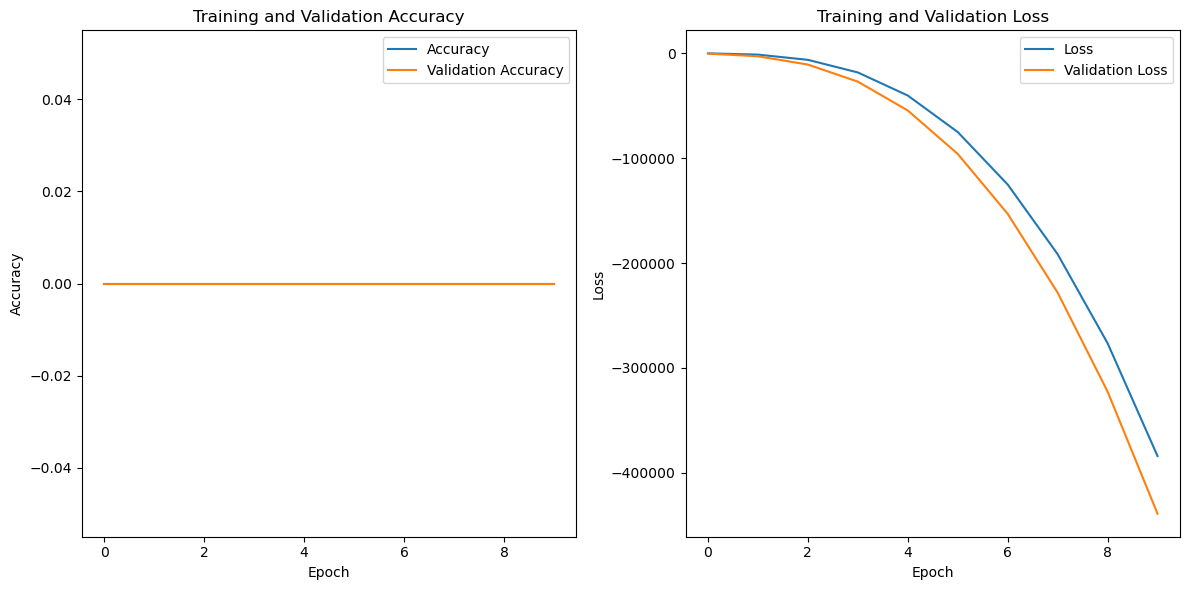

In [43]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

# Load your data and preprocess as needed

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(num_features,)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with specified loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Fit the model to the training data
batch_size = 32  # Adjust as needed
epochs = 10  # Adjust as needed
history = model.fit(train_features_scaled, train_target, batch_size=batch_size, epochs=epochs,
                    validation_data=(validation_features_scaled, validation_target))

# Store training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
In this code:

After training the model, the training history is captured in the history object.
The training and validation accuracy and loss are stored in the history_df DataFrame.
The matplotlib.pyplot library is used to create subplots for accuracy and loss visualizations.
The plt.plot() function is used to plot the training and validation metrics over epochs.
plt.legend(), plt.xlabel(), plt.ylabel(), and plt.title() are used to label and title the plots.
plt.tight_layout() ensures proper spacing between subplots.
plt.show() displays the plots.
Remember to replace num_features with the actual number of features 
in your dataset and adjust the data loading and preprocessing steps as needed. Also, make sure you 
have the matplotlib library installed (pip install matplotlib).

In [ ]:
Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [ ]:
To evaluate the model's performance using the test dataset and report relevant metrics such as
accuracy and loss, you can use the evaluate() method of your Keras model.
Here's how you can do it:

In [44]:
import tensorflow as tf
from tensorflow import keras

# Load your data and preprocess as needed

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(num_features,)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dropout(0.3),  # Dropout
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model with specified loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Fit the model to the training data
batch_size = 32  # Adjust as needed
epochs = 10  # Adjust as needed
history = model.fit(train_features_scaled, train_target, batch_size=batch_size, epochs=epochs,
                    validation_data=(validation_features_scaled, validation_target))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_features_scaled, test_target)

# Print evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               1536      
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dropout_41 (Dropout)        (None, 64)                0         
                                                                 
 dense_62 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
108/108 

In [ ]:
In this code:

After training the model using the fit() method, you can use the evaluate() method to
assess the model's performance on the test dataset.
The evaluate() method returns the test loss and test accuracy, which are then printed as evaluation metrics.
Remember to replace num_features with the actual number of features in your dataset and adjust the data 
loading and preprocessing steps as needed.

In [ ]:
...................................The End.......................